<a href="https://colab.research.google.com/github/wendirad/weekTwo/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
len(data)

13917

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13917 entries, 0 to 13916
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 13777 non-null  float64
 1   Start                                     13917 non-null  object 
 2   Start ms                                  13917 non-null  int64  
 3   End                                       13917 non-null  object 
 4   End ms                                    13917 non-null  int64  
 5   Dur. (ms)                                 13917 non-null  int64  
 6   IMSI                                      13843 non-null  float64
 7   MSISDN/Number                             13769 non-null  float64
 8   IMEI                                      13843 non-null  float64
 9   Last Location Name                        13758 non-null  object 
 10  Avg RTT DL (ms)                   

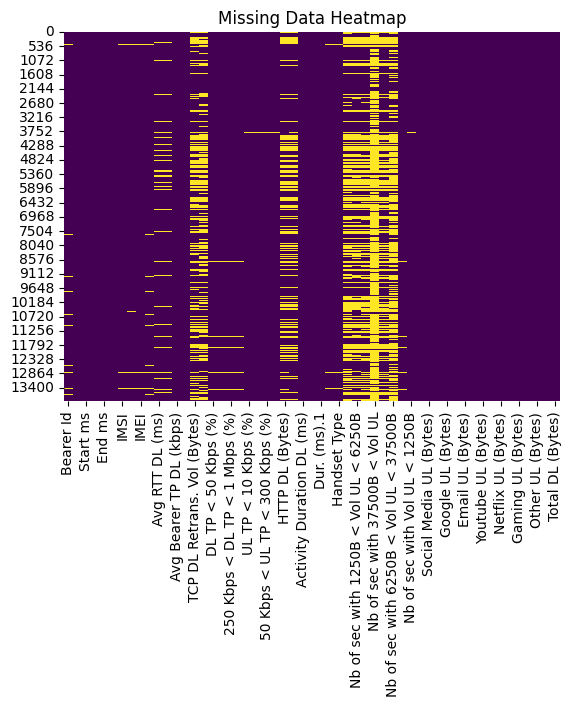

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
columns_to_drop = missing_percentage[missing_percentage > 70].index
data = data.drop(columns=columns_to_drop)

In [ ]:
len(data.columns)

54

## Top 10 handsets and used by the customers.


In [19]:
# Top handsets Type
top_handsets = data['Handset Type'].value_counts().head(10)

In [20]:
top_handsets

,count
Handset Type,
Huawei B528S-23A,2090
Apple iPhone 6 (A1586),1000
Apple iPhone 6S (A1688),820
Apple iPhone 7 (A1778),693
undefined,620
Apple iPhone Se (A1723),491
Apple iPhone 8 (A1905),488
Apple iPhone X (A1901),364
Apple iPhone Xr (A2105),350


### Results Interpretation:
- The **Huawei B528S-23A** is the most frequently used handset type, followed by several Apple iPhone models such as **iPhone 6**, **iPhone 6S**, **iPhone 7**, and others.
- **Samsung Galaxy S8** also appears in the top 10.

In [21]:
# Top handsets Manufacturer
top_handsets_Manufacturer = data['Handset Manufacturer'].value_counts().head(10)

In [22]:
top_handsets_Manufacturer

,count
Handset Manufacturer,
Apple,5926
Huawei,3449
Samsung,2930
undefined,620
Sony Mobile Communications Ab,130
Wiko Global Sasu,130
Xiaomi Communications Co Ltd,67
Oneplus Technology (Shenzhen) Co Ltd,55
Asustek,48


**Results Interpretation:**
The result should show that Apple is the most frequently used handset manufacturer, followed by Samsung and Huawei. The others, like Xiaomi, Oneplus, and Lenovo, are relatively less common.

## Identifying the top 5 handsets per top 3 handset manufacturer

In [23]:
top_manufacturers = ['Apple', 'Samsung', 'Huawei']
filtered_data = data[data['Handset Manufacturer'].isin(top_manufacturers)]
top_5_handsets_per_manufacturer = {}

for manufacturer in top_manufacturers:
    # data for each top 3 manufacturer
    manufacturer_data = filtered_data[filtered_data['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

#the top 5 handsets for each manufacturer
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"Top 5 Handsets for {manufacturer}:")
    print(handsets)
    print("\n")


Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6 (A1586)     1000
Apple iPhone 6S (A1688)     820
Apple iPhone 7 (A1778)      693
Apple iPhone Se (A1723)     491
Apple iPhone 8 (A1905)      488
Name: count, dtype: int64


Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)         304
Samsung Galaxy S7 (Sm-G930X)         213
Samsung Galaxy A5 Sm-A520F           210
Samsung Galaxy J3 (Sm-J330)          187
Samsung Galaxy S7 Edge (Sm-G935X)    166
Name: count, dtype: int64


Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  2090
Huawei E5180                       210
Huawei P20 Lite Huawei Nova 3E     148
Huawei P20                         113
Huawei Y6 2018                      86
Name: count, dtype: int64




Here are the top 5 handsets for the top 3 manufacturers:

### **Apple**:
1. iPhone 6 (A1586) - 1000
2. iPhone 6S (A1688) - 820
3. iPhone 7 (A1778) - 693
4. iPhone Se (A1723) - 491
5. iPhone 8 (A1905) - 488

### **Samsung**:
1. Galaxy S8 (Sm-G950F) - 304
2. Galaxy S7 (Sm-G930X) - 213
3. Galaxy A5 Sm-A520F - 210
4. Galaxy J3 (Sm-J330) - 187
5. Galaxy S7 Edge (Sm-G935X) - 166

### **Huawei**:
1. B528S-23A - 2090
2. E5180 - 210
3. P20 Lite Nova 3E - 148
4. P20 - 113
5. Y6 2018 - 86

**Observation**: Apple dominates with multiple iPhone models, Huawei has a leading model (B528S-23A), and Samsung shows more variety but lower frequencies.

# **Interpretation and Recommendation to marketing teams**
Apple leads with several iPhone models, particularly the iPhone 6 series, indicating strong brand loyalty and preference for older models. Samsung's top handsets are more varied, with a focus on the Galaxy S8 and S7, suggesting continued interest in older premium models. Huawei's top handset, the B528S-23A, outperforms others significantly, which may indicate its popularity among users looking for specific features such as network performance or device stability.
- **Apple**: Consider promoting accessories, upgrades, or trade-in offers targeting loyal customers of older iPhone models.
- **Samsung**: Focus on highlighting the Galaxy S8 and S7 models in targeted campaigns for users seeking affordable premium devices.
- **Huawei**: Explore marketing the B528S-23A more aggressively, perhaps offering exclusive deals for network performance-oriented users.

In [26]:
agg_columns = {
    'Bearer Id': 'nunique',  # Count of unique xDR sessions per user
    'Activity Duration DL (ms)': 'sum',  # Total download duration
    'Activity Duration UL (ms)': 'sum',  # Total upload duration
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}

In [29]:
aggregated_data = data.groupby('IMSI').agg(agg_columns).reset_index()


In [30]:
aggregated_data.head()

,IMSI,Bearer Id,Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Email DL (Bytes),Email UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,2.082001e+14,2,692301,718974.0,1901280.0,91157.0,14707482.0,3718211.0,23540751.0,16183062.0,28574223.0,22852422.0,1.237717e+09,29148727.0,2358866.0,873353.0,6.555374e+08,17422326.0
1,2.082002e+14,1,1443125,404803.0,2964044.0,52989.0,7096184.0,2667120.0,21263080.0,1923718.0,19862420.0,2173329.0,2.431142e+07,6918930.0,1044625.0,861424.0,3.495839e+08,3065986.0
2,2.082003e+14,2,306078,320612.0,4008990.0,57684.0,18091345.0,3358331.0,32062537.0,20046309.0,30597167.0,14507596.0,5.075693e+08,24013895.0,2250987.0,372426.0,1.153546e+09,23181874.0
3,2.082003e+14,1,8389,11738.0,1072525.0,55814.0,563348.0,4049562.0,18019437.0,19833040.0,14286410.0,10929086.0,2.504480e+08,13893204.0,2604977.0,924444.0,1.282454e+08,9115390.0
4,2.082003e+14,2,66127,56380.0,1489504.0,104347.0,4172467.0,4238903.0,36865894.0,19497099.0,16489118.0,35445204.0,9.083767e+08,8318382.0,4960494.0,1159242.0,8.149294e+08,16551389.0


1. **Diverse Usage**: Users engage with a wide variety of applications, with YouTube, Netflix, and Google showing significant data usage across most users.
2. **Heavy Data Consumers**: Some users have high data usage for specific apps, such as YouTube (with downloads like 14,819,244 bytes) or Gaming, reflecting higher engagement levels.
3. **Session Duration**: While some users have short session durations (e.g., 740ms for DL), others have significantly longer durations (e.g., 692,301ms), which may indicate more active or longer sessions.